In [0]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [60]:
# Challenge 1
# You are given a dataset that contains the prices and other attributes of diamonds. The dataset has 9 columns: Carat, color, cut, clarity, depth, table, price, x, y, z.
# carat: Carat weight of the diamond
# cut: Describes cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
# color: Color of the diamond, with D being the best and J the worst
# clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
# depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
# table %: The width of the diamond's table expressed as a percentage of its average diameter
# price: The price of the diamond
# x: length mm
# y: width mm
# z: depth mm
# Your task is to predict the prices of diamonds given carat weight
# Here is the dataset: https://drive.google.com/file/d/1lSgupNhVwXzR9aXbz2G0VwKQGEpx6pFl/view?usp=sharing

diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [61]:
# Identify categorical columns and create a list of them
#
categorical = diamonds.dtypes ==object
categorical_cols = diamonds.columns[categorical].tolist()
print(f"Categorical columns are: \n{categorical_cols}")

Categorical columns are: 
['cut', 'color', 'clarity']


In [62]:
# Instantiate labelencoder
#
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply the label encoder for each column
#
diamonds[categorical_cols] = diamonds[categorical_cols].apply(lambda col: le.fit_transform(col))

diamonds[categorical_cols].head(10)

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
5,4,6,7
6,4,5,6
7,4,4,2
8,0,1,5
9,4,4,4


### OneHotEncoding

In [63]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder()

encoded = ohe.fit_transform(diamonds[categorical_cols].values.reshape(-1,1)).toarray()


dfOneHot = pd.DataFrame(encoded, columns = ['symptom_'+ str(int(i)) for i in range(encoded.shape[1])])

diamonds_encoded = pd.concat([diamonds, dfOneHot], axis=1)
diamonds_encoded

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,symptom_0,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7
0,1.0,0.23,2.0,1.0,3.0,61.5,55.0,326.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.21,3.0,1.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.23,1.0,1.0,4.0,56.9,65.0,327.0,4.05,4.07,2.31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,0.29,3.0,5.0,5.0,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,0.31,1.0,6.0,3.0,63.3,58.0,335.0,4.34,4.35,2.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
161816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
161817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
161818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
diamond_ = diamonds_encoded
diamond_.isnull().sum()

Unnamed: 0    107880
carat         107880
cut           107880
color         107880
clarity       107880
depth         107880
table         107880
price         107880
x             107880
y             107880
z             107880
symptom_0          0
symptom_1          0
symptom_2          0
symptom_3          0
symptom_4          0
symptom_5          0
symptom_6          0
symptom_7          0
dtype: int64

In [0]:
diamond_.dropna(inplace=True)

In [66]:
diamond_.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
symptom_0     False
symptom_1     False
symptom_2     False
symptom_3     False
symptom_4     False
symptom_5     False
symptom_6     False
symptom_7     False
dtype: bool

In [67]:
diamond_.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'symptom_0', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7'],
      dtype='object')

In [68]:
len(diamond_.columns)

19

In [77]:
d1 = diamond_.iloc[:, 1:7]
d2 = diamond_.iloc[:, 8:19]

X = diamond_.iloc[:, 1:2]
y = diamond_.iloc[:, 7:8]

print(X, "\n", y)

       carat
0       0.23
1       0.21
2       0.23
3       0.29
4       0.31
...      ...
53935   0.72
53936   0.72
53937   0.70
53938   0.86
53939   0.75

[53940 rows x 1 columns] 
         price
0       326.0
1       326.0
2       327.0
3       334.0
4       335.0
...       ...
53935  2757.0
53936  2757.0
53937  2757.0
53938  2757.0
53939  2757.0

[53940 rows x 1 columns]


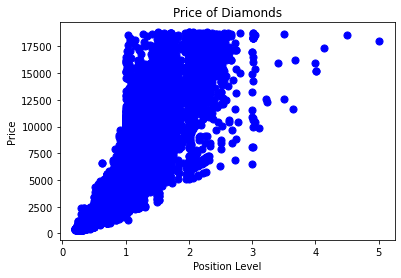

In [78]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue', s=50, cmap='viridis') 
plt.title('Price of Diamonds')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()

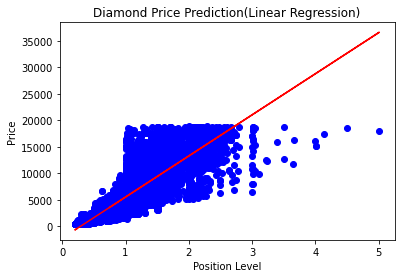

In [81]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Diamond Price Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()

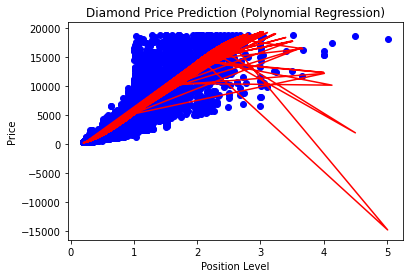

In [89]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

p_reg = LinearRegression()
p_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, p_reg.predict(X_poly), color='red')
plt.title('Diamond Price Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()


So now let's optimize our model

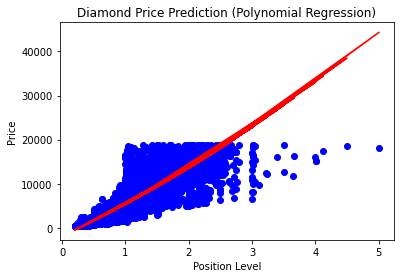

In [90]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

p_reg = LinearRegression()
p_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, p_reg.predict(X_poly), color='red')
plt.title('Diamond Price Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()


**Observation**

When we increase the degree to 3, the model is able to capture most of the data points. This is an example of over-fitting. This model is simply too perfect which is not good for us when we using an unseen data.

**Making Predictions**

The final step is use the model we created to make the our desired prediction.

To check how accurate polynomial regression is, we are going to predict the salary using both linear regression and polynomial regression

In [92]:
# Predict using Linear Regression
lin_pred = reg_line.predict([[0.39]])
print(f"Linear prediction: {lin_pred}")

# Predict using Polynormial Regression
poly_pred = p_reg.predict(poly_reg.fit_transform([[0.39]]))
print(f"Polynomial prediction: {poly_pred}")


Linear prediction: [[768.64541096]]
Polynomial prediction: [[848.71689971]]


In [94]:
# Challenge 2
# The dataset for this challenge represents the physicochemical tests of wine and the quality of wine as a result of these physicochemical tests. Here's a brief description of the columns
# volatile acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
# citric acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines
# residual sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
# chlorides: The amount of salt in the wine
# free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
# total sulfur dioxide: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
# density: The density of water is close to that of water depending on the percent alcohol and sugar content
# pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
# sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
# alcohol: The percent alcohol content of the wine
# quality: Output variable (based on sensory data, score between 0 and 10)

# Here is a link to the dataset: https://drive.google.com/open?id=1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4

# Use polynomial regression to predict quality of wine using the physiochemical tests

# Hint:Try to get how well your model has been fitted using RMSE without necessarily plotting a graph

wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [107]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [122]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [120]:
wine.iloc[:, :11]
y = wine.iloc[:,-1:]
print(f"{X} \n---**********--- \n{y}")

    fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0             7.4              0.70         0.00  ...       0.56      9.4        5
1             7.8              0.88         0.00  ...       0.68      9.8        5
2             7.8              0.76         0.04  ...       0.65      9.8        5
3            11.2              0.28         0.56  ...       0.58      9.8        6
4             7.4              0.70         0.00  ...       0.56      9.4        5
5             7.4              0.66         0.00  ...       0.56      9.4        5
6             7.9              0.60         0.06  ...       0.46      9.4        5
7             7.3              0.65         0.00  ...       0.47     10.0        7
8             7.8              0.58         0.02  ...       0.57      9.5        7
9             7.5              0.50         0.36  ...       0.80     10.5        5
10            6.7              0.58         0.08  ...       0.54      9.2        5

[11

ValueError: ignored

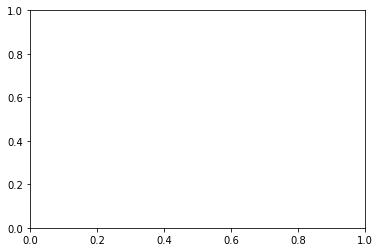

In [121]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()